In [99]:
using Pkg; Pkg.activate("."); Pkg.instantiate()

 Activating environment at `~/Documents/kubo_analysis_julia/notebook/Project.toml`


# 3 一般化線形モデル(GLM) -ポアソン回帰-

In [100]:
using CSV
using DataFrames
using GLM
using LaTeXStrings
using Plots
using StatsBase
using StatsPlots

## 3.2 観測されたデータの概要を調べる

In [101]:
df = CSV.read(joinpath("..", "data/section3.csv"))

,y,x,f
,Int64,Float64,String
1,6,8.31,C
2,6,9.44,C
3,6,9.5,C
4,12,9.07,C
5,10,10.16,C
6,4,8.32,C
7,9,10.61,C
8,9,10.06,C
9,9,9.93,C


### 列ごとにデータを表示

In [102]:
df.x

100-element CSV.Column{Float64,Float64}:
  8.31
  9.44
  9.5
  9.07
 10.16
  8.32
 10.61
 10.06
  9.93
 10.43
 10.36
 10.15
 10.92
  ⋮
 10.73
  8.85
 11.2
  9.86
 11.54
 10.03
 11.88
  9.15
  8.52
 10.24
 10.86
  9.97

In [103]:
df.y

100-element CSV.Column{Int64,Int64}:
  6
  6
  6
 12
 10
  4
  9
  9
  9
 11
  6
 10
  6
  ⋮
  4
  5
  6
  5
  8
  5
  9
  8
  6
  8
  7
  9

In [104]:
df.f

100-element CSV.Column{String,PooledString}:
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 "C"
 ⋮
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"
 "T"

### データオブジェクトの型を調べる

In [105]:
typeof(df)

DataFrame

In [106]:
typeof(df.y)

CSV.Column{Int64,Int64}

In [107]:
typeof(df.x)

CSV.Column{Float64,Float64}

In [108]:
typeof(df.f)

### データの要約

CSV.Column{String,PooledString}

In [109]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,y,7.83,2,8.0,15,,,Int64
2,x,10.0891,7.19,10.155,12.4,,,Float64
3,f,,C,,T,2,,String


## 3.3 統計モデリングの前にデータを図示する
### データの図示
散布図

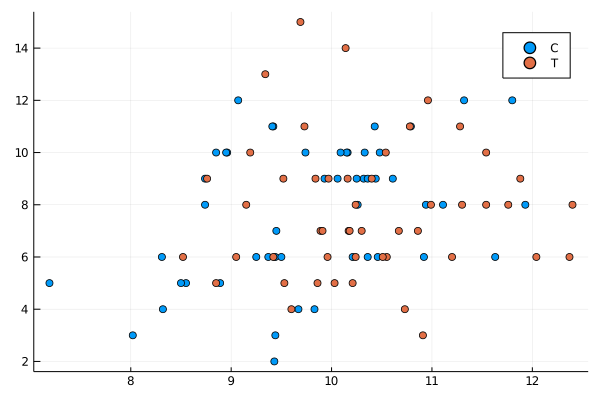

In [110]:
scatter(df.x, df.y, group=df.f)

箱ひげ図

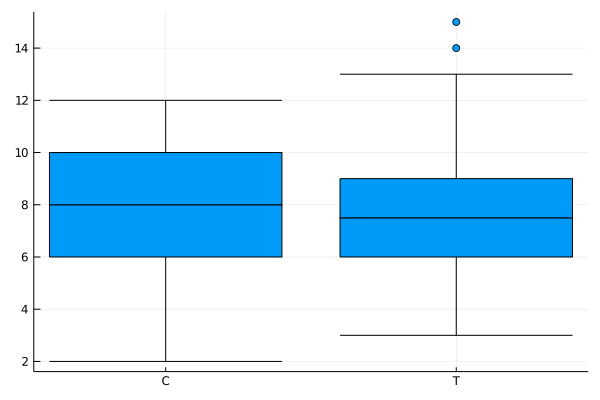

In [111]:
boxplot(df.f, df.y, label="")

## 3.4 ポアソン回帰の統計モデル
### 3.4.2 当てはめと当てはまりの良さ
### GLMのフィッティング
http://juliastats.github.io/GLM.jl/latest/examples/

In [112]:
names(df)

3-element Array{String,1}:
 "y"
 "x"
 "f"

In [113]:
result = glm(@formula(y ~ x), df, GLM.Poisson())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Poisson{Float64},LogLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y ~ 1 + x

Coefficients:
───────────────────────────────────────────────────────────────────────────
              Estimate  Std. Error  z value  Pr(>|z|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  1.29172     0.363686   3.55174    0.0004   0.578909   2.00453
x            0.0756619   0.0356042  2.12509    0.0336   0.005879   0.145445
───────────────────────────────────────────────────────────────────────────

In [114]:
loglikelihood(result)

-235.3862507698607

### 3.4.3 ポアソン回帰モデルによる予測

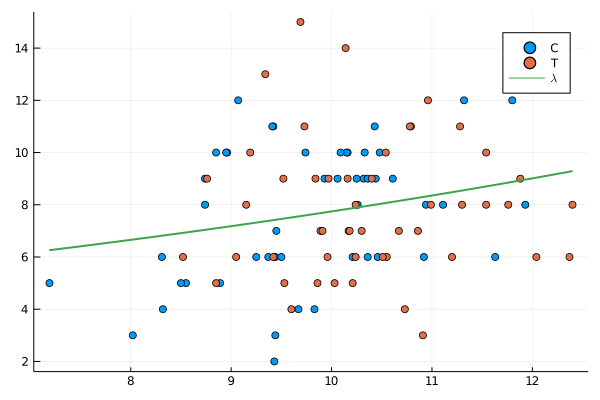

sh: latex: command not found
latex: failed to create a dvi file


In [115]:
plot(df.x, df.y, group=df.f, seriestype=:scatter)
xx = range(minimum(df.x), maximum(df.x), length=100)
plot!(xx, exp.(1.29 .+ 0.0757 .* xx), linewidth=2, label=L"\lambda")

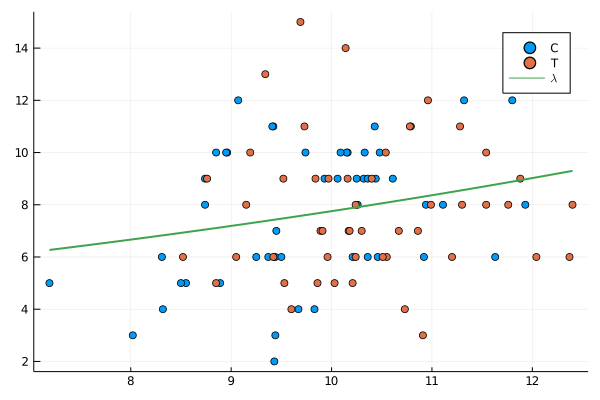

sh: latex: command not found
latex: failed to create a dvi file


In [116]:
plot(df.x, df.y, group = df.f, seriestype=:scatter)
xx = DataFrame(x=range(minimum(df.x), maximum(df.x), length=100))
yy = predict(result, xx)
plot!(xx.x, yy, linewidth=2, label=L"\lambda")

## 3.5 説明変数が因子型の統計モデル

In [117]:
result_f = glm(@formula(y ~ f), df, GLM.Poisson())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Poisson{Float64},LogLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y ~ 1 + f

Coefficients:
─────────────────────────────────────────────────────────────────────────────
              Estimate  Std. Error    z value  Pr(>|z|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  2.05156     0.050702   40.463       <1e-99   1.95218    2.15093
f: T         0.0127716   0.0714756   0.178684    0.8582  -0.127318   0.152861
─────────────────────────────────────────────────────────────────────────────

In [118]:
loglikelihood(result_f)

-237.6272569606868

## 3.6 説明変数が数量型 + 因子型の統計モデル

In [119]:
result_all = glm(@formula(y ~ x + f), df, GLM.Poisson())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Poisson{Float64},LogLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y ~ 1 + x + f

Coefficients:
────────────────────────────────────────────────────────────────────────────────
               Estimate  Std. Error    z value  Pr(>|z|)    Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)   1.26311     0.369629    3.41722     0.0006   0.538646     1.98756
x             0.0800726   0.0370369   2.16197     0.0306   0.00748169   0.152664
f: T         -0.0319994   0.0743789  -0.430221    0.6670  -0.177779     0.113781
────────────────────────────────────────────────────────────────────────────────

In [120]:
loglikelihood(result_all)

-235.29371924249367

### 対数リンク関数のわかりやすさ : 掛け算される効果
恒等リンク関数

In [121]:
result_identity = glm(@formula(y ~ x + f), df, GLM.Poisson(), IdentityLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Poisson{Float64},IdentityLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y ~ 1 + x + f

Coefficients:
──────────────────────────────────────────────────────────────────────────────
              Estimate  Std. Error    z value  Pr(>|z|)   Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)   1.26602     2.8432     0.445279    0.6561  -4.30655     6.83858
x             0.660745    0.289658   2.28112     0.0225   0.0930252   1.22846
f: T         -0.204678    0.582247  -0.351532    0.7252  -1.34586     0.936504
──────────────────────────────────────────────────────────────────────────────

In [122]:
loglikelihood(result_identity)

-235.1589726266506

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*